#### Implementation
### Bài tập 1

In [ ]:
# dataset
# !gdown 1Z3bs8lnk6os1n5RE7x_p75JR-1yk1sfi
# !unzip advertising.zip

import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input  and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X,y

In [5]:
X,y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


### Bài tập 2

In [25]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b  = 0

    w1, w2, w3, b = (0.969852, 0.981522, 1.778945, 0)
    # w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

print(initialize_params())

(0.969852, 0.981522, 1.778945, 0)


In [ ]:
initialize_params()
# compute output and loss
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

def compute_loss(y_hat, y):
    return (y_hat - y)**2

# compute gradient
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat-y)
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db

# update weights
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b  = b - lr*dl_db
    return b

In [ ]:
import pandas as pd
import io

# The new rows of data from the image
new_data = """
7,3.9,12.17
8,4.3,12.70
9,5.1,13.65
10,6.4,15.50
"""

new_df = pd.read_csv(io.StringIO(new_data), header=None, names=['month', 'x', 'y'])
X = [new_df['month'].tolist(), new_df['x'].tolist()]
y = new_df['y'].tolist()

print(X)


In [ ]:
# # x1=0.969852
# # x2=0.981522
# # x3=1.778945
# # w1, w2, w3, b = initialize_params()
# w1 = 1.17
# b = 0.26
# x = 6.2

# y_hat = predict(x1, x2, x3, w1=0, w2=0, w3=0, b=0)
# print(y_hat)
# y_p = 1.322319
# loss = compute_loss(y_hat, y_p)
# print('loss:', loss)

# def compute_gradient_wi(xi, y, y_hat):
#     dl_dwi = 2*xi*(y_hat-y)
#     return dl_dwi

# def compute_gradient_b(y, y_hat):
#     dl_db = 2*(y_hat-y)
#     print((y_hat-y))
#     return dl_db

# # update weights
# def update_weight_wi(wi, dl_dwi, lr=0.0004):
#     wi = wi - lr*dl_dwi
#     return wi

# lr = 0.0001
# b = 0
# dl_dwi = compute_gradient_wi(x1, y_p, y_hat)
# dl_db = compute_gradient_b(y_p, y_hat)
# w1 = update_weight_wi(w1, dl_dwi, lr)
# b1 = update_weight_b(b, dl_db, lr)
# print('dl_dwi:', dl_dwi)
# print('dl_db', dl_db)
# print(w1)
# print(b)

w1=0.8905
w2=0.3169
w3=-0.0053
b=0.0066


def predict(x1, w1, b):
    return w1*x1 + b

y_hat = predict(x1=6.2, w1=1.17, b=0.62)
print('new', y_hat)


new 7.874


1B
2C
3A
4C
5B
6C
7B
8A
9C
10B
11D
12A
13B
14D
15A
16B
17B
18B
19A
20B
21A
22B
23B
24C
25B
26C
27C
28D
29D
30A
31B

In [145]:
1.17 * 6.2 + 0.26

7.513999999999999

In [97]:
import pandas as pd
import io
import numpy as np

# single-feature versions of functions (w1, b, x only)
def predict(x, w1, b):
    return np.dot(x, w1) + b

def compute_loss(y_hat, y):
    return np.sum(y_hat - y) ** 2

def compute_gradient_wi(xi, y, y_hat):
    return 2 * np.dot(xi, (y_hat - y))

def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

def update_weight_wi(wi, dl_dwi, lr=1e-4):
    return wi - np.dot(dl_dwi, lr)

def update_weight_b(b, dl_db, lr=1e-4):
    return b - np.dot(dl_db, lr)


# Dữ liệu
n = 2
x = np.array([3.9, 4.3, 5.1, 6.4])
# x = x[:n]
print(x)
y = np.array([12.17, 12.70, 13.65, 15.50])
# y = y[:n]

N = (1/len(x))

# Thông số ban đầu
w = 1.12
b = 0.28
lr = 0.01
# 1️⃣ Tính y_hat
y_hat = w * x + b

# 2️⃣ Tính MSE
mse = np.mean((y_hat - y) ** 2)
mae = np.mean(np.abs(y_hat - y))

dw = np.dot(2*x, (y_hat - y))
db = np.dot(2, (y_hat - y))

w = w - lr*N*np.sum(dw)
b = b - lr*N*np.sum(db)

# single-feature versions of functions (w1, b, x only)
print('w, b:', round(w, 2), round(b,2))

x = 6.4
y = 15.50
N = 1

y_hat = w * x + b

# 2️⃣ Tính MSE
mse = np.mean((y_hat - y) ** 2)
mae = np.mean(np.abs(y_hat - y))

dw = np.dot(2*x, (y_hat - y))
db = np.dot(2, (y_hat - y))

w = w - lr*N*np.sum(dw)
b = b - lr*N*np.sum(db)

# single-feature versions of functions (w1, b, x only)
print('w2, b2:', round(w, 2), round(b,2))

x=6.6
p = predict(x, w, b)
print('p:', round(p, 2))
# 3️⃣ In kết quả (làm tròn 2 chữ số thập phân)
# print("Giá trị dự đoán (y_hat):", np.round(y_hat, 2))
# print("MSE:", round(mae, 2))

[3.9 4.3 5.1 6.4]
w, b: 1.88 0.43
w2, b2: 2.27 0.49
p: 15.47


In [ ]:
# import pandas as pd
# import io
# import numpy as np

# ESP = 2.0
# # single-feature versions of functions (w1, b, x only)
# def predict(x, w1, b):
#     return np.dot(x, w1) + b

# def compute_loss(y_hat, y):
#     return np.sum(y_hat - y) ** 2

# def compute_huber_loss(y_hat, y, epsilon=ESP):
#     if np.abs(y_hat - y) < epsilon:
#         print(1/2 * (y_hat - y)**2)
#     else:
#         np.dot(epsilon, np.abs(y_hat - y) - 1/2*(epsilon**2))

# def compute_huber_regression(y_hat, y, w, lr, N):
#     return 1/N * compute_huber_loss(y_hat, y) + lr*(w**2)

# def compute_gradient_wi(xi, y, y_hat):
#     return 2 * np.dot(xi, (y_hat - y))

# def compute_gradient_b(y, y_hat):
#     return 2 * (y_hat - y)

# def update_weight_wi(wi, dl_dwi, lr=1e-4):
#     return wi - np.dot(dl_dwi, lr)

# def update_weight_b(b, dl_db, lr=1e-4):
#     return b - np.dot(dl_db, lr)


# # Dữ liệu
# n = 2
# x = np.array([3.9, 4.3, 5.1, 6.4])
# # x = x[:n]
# print(x)
# y = np.array([12.17, 12.70, 13.65, 15.50])
# # y = y[:n]

# N = (1/len(x))

# # Thông số ban đầu
# w = 1.12
# b = 0.28
# lr = 0.01
# # 1️⃣ Tính y_hat
# y_hat = w * x + b

# # 2️⃣ Tính MSE
# mse = np.mean((y_hat - y) ** 2)
# mae = np.mean(np.abs(y_hat - y))

# dw = np.dot(2*x, (y_hat - y))
# db = np.dot(2, (y_hat - y))

# w = w - lr*N*np.sum(dw)
# b = b - lr*N*np.sum(db)

# # single-feature versions of functions (w1, b, x only)
# print('w, b:', round(w, 2), round(b,2))

# x = 6.4
# # y = 15.50
# N = 1

# y_hat = w * x + b

# # 2️⃣ Tính MSE
# mse = np.mean((y_hat - y) ** 2)
# mae = np.mean(np.abs(y_hat - y))

# dw = np.dot(2*x, (y_hat - y))
# db = np.dot(2, (y_hat - y))

# w = w - lr*N*np.sum(dw)
# b = b - lr*N*np.sum(db)

# # single-feature versions of functions (w1, b, x only)
# print('w2, b2:', round(w, 2), round(b,2))

# x=6.6
# p = predict(x, w, b)
# print('p:', round(p, 2))
# # 3️⃣ In kết quả (làm tròn 2 chữ số thập phân)
# # print("Giá trị dự đoán (y_hat):", np.round(y_hat, 2))
# # print("MSE:", round(mae, 2))

[3.9 4.3 5.1 6.4]
w, b: 1.88 0.43
w2, b2: 2.4 0.52
p: 16.39


In [ ]:
import io
import numpy as np

ESP = 2.0
# single-feature versions of functions (w1, b, x only)
def predict(x, w1, b):
    return np.dot(x, w1) + b

def compute_loss(y_hat, y):
    return np.sum(y_hat - y) ** 2

def compute_huber(X, y_hat, y, epsilon=ESP):
    R = y_hat - y
    # where(input) -> return if(input), else(input)
    # dw: 0.5 * (wx + b - y)**2 -> derivartive -> y_hat-y * xy
    # db -> y_hat - y
    # return np.where(np.abs(r) <= epsilon, 0.5 * r**2, epsilon * np.abs(r) - 0.5 * epsilon**2)
    grad_w_list, grad_b_list = [], []

    for xi, ei in zip(x, R):
        if abs(ei) <= ESP:

            dL_dw_i = ei * xi
            dL_db_i = ei
        else:

            dL_dw_i = ESP * np.sign(ei) * xi
            dL_db_i = ESP * np.sign(ei)

        grad_w_list.append(dL_dw_i)
        grad_b_list.append(dL_db_i)

    grad_w_list, grad_b_list = np.array(grad_w_list), np.array(grad_b_list)
    return grad_w_list, grad_b_list

# def compute_huber_regression(y_hat, y, w, lr, N):
#     return 1/N * compute_huber(y_hat, y) + lr*(w**2)

def compute_gradient_wi(xi, y, y_hat):
    return 2 * np.dot(xi, (y_hat - y))

def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

def compute_gradient_wi_huber(N, y, y_hat, w):
    dL_dwi, _ = compute_huber(x, y_hat, y)

    # print('huber:', compute_huber(y_hat, y))
    return 1/N * np.sum(dL_dwi) + np.dot(2*lamb, w)

def compute_gradient_bi_huber(N, y, y_hat):
    _, dL_dbi = compute_huber(x, y_hat, y)

    return 1/N * np.sum(dL_dbi)

def update_weight_wi(wi, dl_dwi, lr=1e-4):
    return wi - np.dot(dl_dwi, lr)

def update_weight_b(b, dl_db, lr=1e-4):
    return b - np.dot(dl_db, lr)


# Dữ liệu
n = 5
x = np.array([3.2, 5.5, 6.8, 8.0, 9.2])
x = x[:n]
print(x)
y = np.array([4.6, 7.5, 9.8, 10.9, 12.5])
y = y[:n]

N = len(x)

# Thông số ban đầu
w = 1.05
b = 0.35
lr = 0.01
lamb = 0.1


# 1️⃣ Tính y_hat
y_hat = w * x + b

# dw = np.dot(2*x, (y_hat - y))
# db = np.dot(2, (y_hat - y))
dw = compute_gradient_wi_huber(N, y, y_hat, w)
db = compute_gradient_bi_huber(N, y, y_hat)

dw_huber = update_weight_wi(w, dw, lr=lr)
db_huber = update_weight_b(b, db, lr=lr)

# w_huber = w - lr*np.sum(dw_huber)
# b_huber = b - lr*np.sum(db_huber)

# single-feature versions of functions (w1, b, x only)
# print('w, b:', round(w, 2), round(b,2))

# y_hat = w_huber * x + b

# 2️⃣ Tính MSE
mse = np.mean((y_hat - y) ** 2)
# mae = np.mean(np.abs(y_hat - y))

# dw = np.dot(2*x, (y_hat - y))
# db = np.dot(2, (y_hat - y))

# w = w - lr*N*np.sum(dw)
# b = b - lr*N*np.sum(db)

# # single-feature versions of functions (w1, b, x only)
# print('w2, b2:', round(w, 2), round(b,2))
print('w_huber, b_huber:', dw_huber, db_huber)


print('compute_huber_loss:', compute_huber(x, y_hat, y))
huber_loss_regu = 1/N * np.sum(compute_huber(x, y_hat, y)) + lamb * (w**2) # add regularization
huber_loss = 1/N * np.sum(compute_huber(x, y_hat, y))
print('huber_loss1:', huber_loss_regu)
print('huber_loss1:', huber_loss)
# print("MSE:", mse)

# x=6.6
# p = predict(x, w, b)
# print('p:', round(p, 2))
# 3️⃣ In kết quả (làm tròn 2 chữ số thập phân)
# print("Giá trị dự đoán (y_hat):", np.round(y_hat, 2))
# print("MAE:", round(mae, 2))
#? recheck


[3.2 5.5 6.8 8.  9.2]
w_huber, b_huber: 1.1647210000000001 0.36652999999999997
compute_huber_loss: (array([ -2.848 ,  -7.5625, -13.6   , -16.    , -18.4   ]), array([-0.89 , -1.375, -2.   , -2.   , -2.   ]))
huber_loss1: -13.22485
huber_loss1: -13.3351


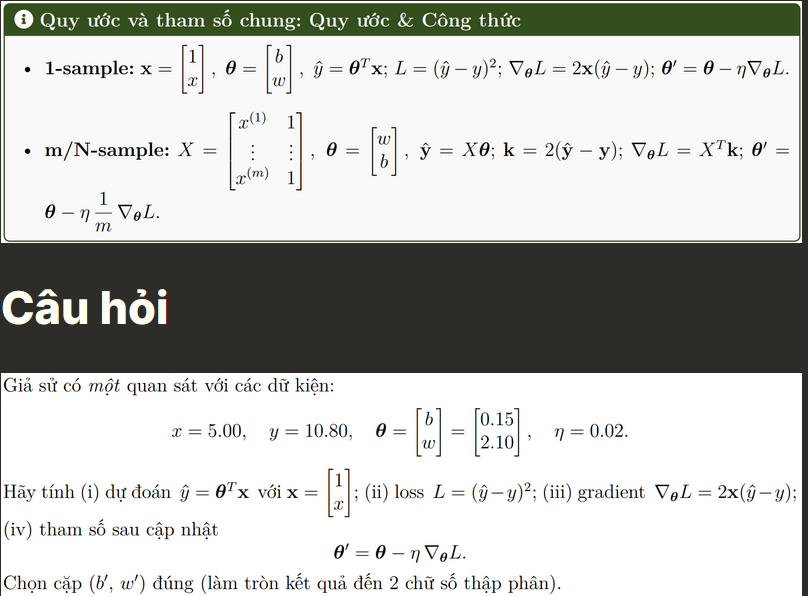

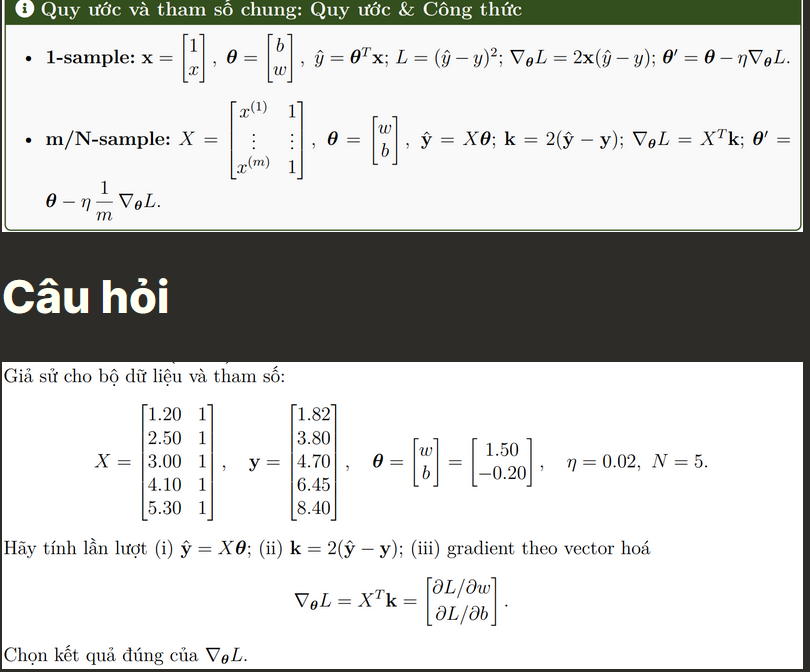

In [106]:
def compute_loss(y_hat, y):
    return np.abs(y_hat - y)

l = compute_loss(y_hat=7.08, y=6.9)
print(round(l, 2))

0.18


In [ ]:
# compute gradient
g_wi = compute_gradient_wi(xi=4.8, y=5.8, y_hat=5.5)
print(round(g_wi))

-3


In [11]:
g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [12]:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [13]:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print(after_b)


0.50001


In [ ]:
# y_hat = predict(x1, x2, x3, w1, w2, w3, b)

In [14]:

def implement_linear_regression(X_data, y_data, epoch_max = 50,lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)
  for epoch in range(epoch_max):
      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)

          # compute loss
          loss = compute_loss(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

          # update parameters
          w1 = update_weight_wi(w1, dl_dw1, lr)
          w2 = update_weight_wi(w2, dl_dw2, lr)
          w3 = update_weight_wi(w3, dl_dw3, lr)
          b  = update_weight_b(b, dl_db, lr)

          # logging
          losses.append(loss)
  return (w1,w2,w3,b, losses)

[326.9667843262905, 16.813661135067065, 53.03153479688057, 9.097721194637154, 3.6424308051668244, 7.563752860234681, 22.66109565599889, 0.2903595791172754, 14.838547485180843, 24.076309414072263, 40.37629497003938, 5.1268803606027795, 13.518222414308081, 29.260234447005313, 6.298237914505083, 9.162549922566846, 0.026579461634628335, 26.706667137444764, 31.588025437397253, 7.299166664675038, 4.87832661040257, 0.06589490698448672, 4.659432930180689, 8.197887498801554, 10.726801676543044, 46.88850553057548, 37.00183951157569, 7.945648850356329, 13.192456099944478, 12.99508446043089, 3.692858118961234, 8.94362747789156, 30.181447411539107, 11.431671284831852, 36.174366413011626, 7.460278650398524, 86.65149410437682, 5.3701391264310505, 5.3518169904114785, 46.336728755672745, 2.5374346878656464, 1.4161484943898264, 6.706004362616138, 15.295560375546378, 9.923480328914641, 0.04638468028698762, 1.7385993721560624, 1.6392488216093404, 9.405606514050849, 5.91762067788424, 0.22728553410458135, 7

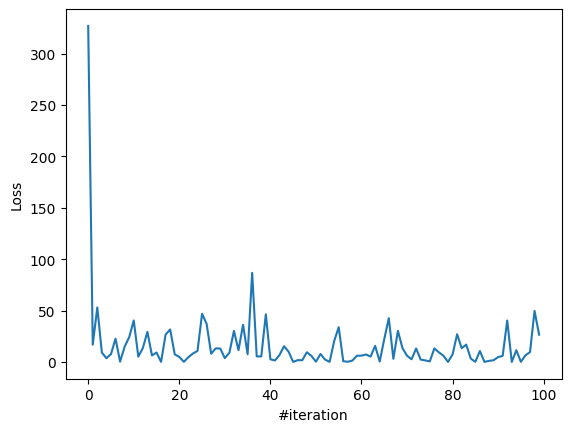

In [16]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(losses[0:100])
plt.plot(losses[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [17]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


#### Inference

In [ ]:

# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
# w1,w2,w3,b, losses

X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


### Data normalization

In [20]:
# ---------------------------
# 1. Min-Max Scaling
# ---------------------------
def min_max_scaling(X):
    mins = []
    maxs = []
    X_scaled = []

    # Tìm min và max cho từng feature
    for feature in X:
        min_val = min(feature)
        max_val = max(feature)
        mins.append(min_val)
        maxs.append(max_val)

        # Scale từng phần tử
        scaled_feature = []
        for x in feature:
            scaled_x = (x - min_val) / (max_val - min_val)
            scaled_feature.append(scaled_x)

        X_scaled.append(scaled_feature)

    return X_scaled, mins, maxs


# ---------------------------
# 2. Inverse Min-Max
# ---------------------------
def inverse_min_max_scaling(X_scaled, mins, maxs):
    X_recovered = []

    for i in range(len(X_scaled)):
        feature = X_scaled[i]
        min_val = mins[i]
        max_val = maxs[i]

        recovered_feature = []
        for x in feature:
            original_x = x * (max_val - min_val) + min_val
            recovered_feature.append(original_x)

        X_recovered.append(recovered_feature)

    return X_recovered


In [21]:
# ---------------------------
# 3. Z-Score Scaling
# ---------------------------
def z_score_scaling(X):
    means = []
    stds = []
    X_scaled = []

    for feature in X:
        mean_val = sum(feature) / len(feature)
        means.append(mean_val)

        std_val = (sum((x - mean_val) ** 2 for x in feature) / (len(feature) - 1)) ** 0.5
        stds.append(std_val)

        scaled_feature = []
        for x in feature:
            scaled_x = (x - mean_val) / std_val
            scaled_feature.append(scaled_x)

        X_scaled.append(scaled_feature)

    return X_scaled, means, stds


# ---------------------------
# 4. Inverse Z-Score
# ---------------------------
def inverse_z_score_scaling(X_scaled, means, stds):
    X_recovered = []

    for i in range(len(X_scaled)):
        feature = X_scaled[i]
        mean_val = means[i]
        std_val = stds[i]

        recovered_feature = []
        for x in feature:
            original_x = x * std_val + mean_val
            recovered_feature.append(original_x)

        X_recovered.append(recovered_feature)

    return X_recovered

In [ ]:
# ---------------------------
# Ví dụ chạy thử
# ---------------------------
# data1 = [1, 2, 3]
# data2 = [4, 5, 6]
# data3 = [7, 8, 9]
# X = [data1, data2, data3]

# Min-Max
# X_minmax, mins, maxs = min_max_scaling(X)
# print("Min-Max Scaled:", X_minmax)
# print("Recovered Min-Max:", inverse_min_max_scaling(X_minmax, mins, maxs))

# Z-Score
X_zscore, means, stds = z_score_scaling(X)

print("\nZ-Score Scaled:", X_zscore)
print("Recovered Z-Score:", inverse_z_score_scaling(X_zscore, means, stds))

Min-Max Scaled: [[0.0, 0.5, 1.0], [0.0, 0.5, 1.0], [0.0, 0.5, 1.0]]
Recovered Min-Max: [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]

Z-Score Scaled: [[-1.0, 0.0, 1.0], [-1.0, 0.0, 1.0], [-1.0, 0.0, 1.0]]
Recovered Z-Score: [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]


In [ ]:
# std_val = (sum((x - 15.1205) ** 2 for x in feature) / (len(feature) - 1)) ** 0.5

In [24]:
# z = (x - mean) / std

z = 1.322319
mean = 15.1305
std = 5.283892
x = z * std + mean
x

22.117490785548